# An introduction to simplicial complexes

![alt text](sc.png)

## Table of contents

- 1. [Simplexes](#simplexes)
- 2. [Simplicial complexes](#simplicial_complexes)
- 3. [Incidence matrices](#incidence_matrices)
- 4. [Up-Laplacians](#up_laplacians)
- 5. [Down-Laplacians](#down_laplacians)
- 6. [Hodge Laplacians](#hodge_laplacians)
- 7. [Assigning features](#assigning_features)

## 0. Import required packages

In [1]:
import numpy as np

from toponetx import SimplicialComplex as sc

<a id='simplexes'></a>

## 1. Simplexes

### Informal introduction to the notion of simplex

A simplex is a generalisation of the notion of a triangle $[3]$. The name 'simplex' comes from the fact that it is the simplest polytope (geometric object with flat sides $[4]$) for a given dimension. For example, a 0-simplex is a point, a 1-simplex is a line segment, a 2-simplex is a triangle and a 3-simplex is a tetrahedron. The figure below displays an example of a 1-simplex and an example of a 2-simplex.

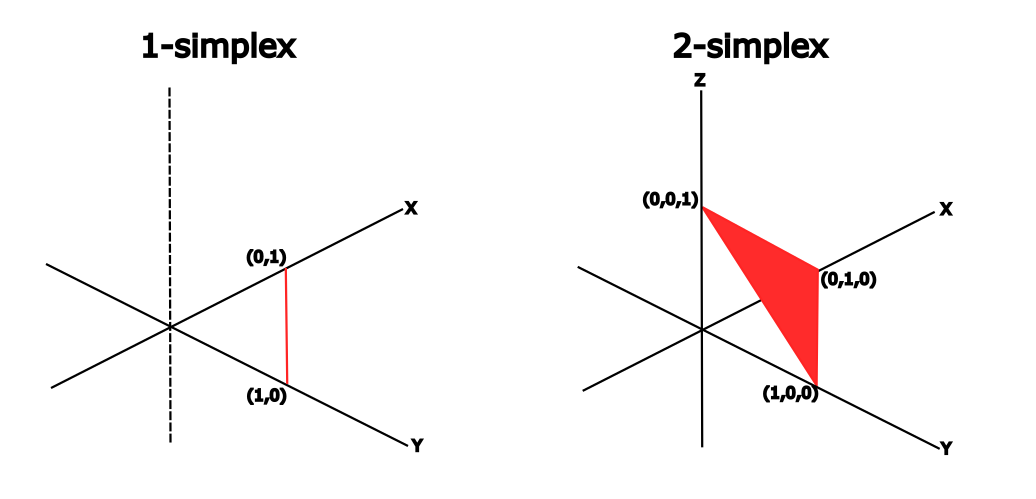

### Definition of convex hull

The *convex hull* for a set of points is the smallest convex polygon (TODO 5: what is mentioned in parenthesis correct? convex referring to the fact that all vertices point outwards) that encloses all of the points in that set $[5]$.

### Definition of N-simplex

The standard *N-simplex* is the convex hull in $\mathbb{R} ^{N+1}$ of all points with all coordinates zero, except for a single coordinate with value one $[6]$.

<a id='simplicial_complexes'></a>

## 2. Simplicial complexes

### Definition of abstract simplicial complex

A set-family $\Delta$ is called an *abstract simplicial complex* if for every set $X$ in $\Delta$ and every non-empty subset $Y \subseteq X$, the set $Y$ also belongs to $\Delta$ $[1]$.

### Example 1 of simplicial complex: a graph

Consider the undirected graph below, which consists of seven nodes and eight edges. According to the definition of (abstract) simplicial complex, every set of the graph must have all of its non-empty subsets also in the graph. This holds, since for every edge in the graph, the corresponding two vertices belong to the graph.

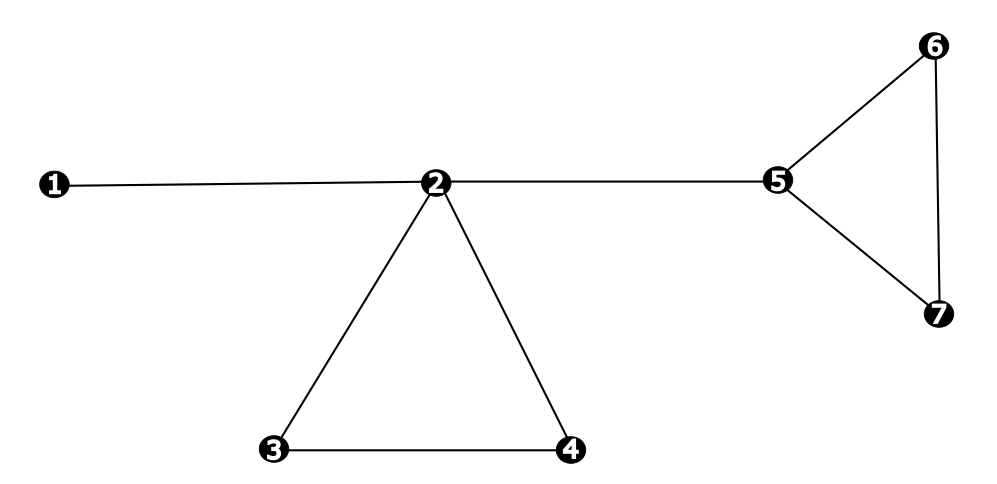

The graph of example 1 can be instantiated in `ToponetX` as a simplicial complex using the code below, based on the edge set representation of the graph.

In [2]:
edge_set = [[1, 2], [2, 3], [2, 4], [3, 4], [2, 5], [5, 6], [5, 7], [6, 7]]
sc_example1 = sc(edge_set)

The simplices forming the simplicial complex corresponding to the graph of example 1 can be listed using the code below.

In [3]:
sc_example1.simplices

SimplexView([(1,), (2,), (3,), (4,), (5,), (6,), (7,), (1, 2), (2, 3), (2, 4), (3, 4), (2, 5), (5, 6), (5, 7), (6, 7)])

### Example 2 of simplicial complex: a graph with faces

A more advanced version of this is a 2D example which involves faces. This example can be seen below. This mesh is made up of 5 nodes, 7 edges and 2 faces. The two faces are the spaces bounded by edges that are filled in with the colour red.

To express this as a set:

$[[1,2], [1,3],[2,3,4], [2,4,5]]$. 

This set shows the two edges that are not involved in any faces, and the two faces along with which three nodes they are made from. 

<div>
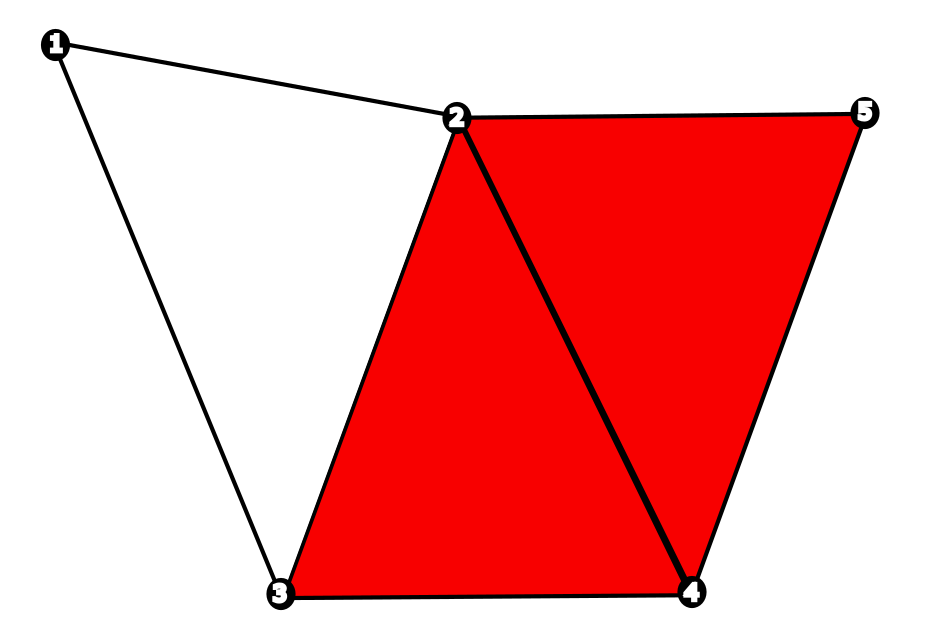
</div>

Let's try implementing this into some code so that we can work with the simplicial complex. 

In [4]:
edge_set = [[1, 2], [1, 3]]
face_set = [[2, 3, 4], [2, 4, 5]]

sc_example2 = sc(edge_set + face_set)

Running this will set our mesh as a simplical complex, so that information is now stored and we can use the functions from toponetx to work with it. It will store the two faces, the edges that make up those faces along with the other edges not involved with any faces and all of the nodes involved.

In [5]:
sc_example2.simplices

SimplexView([(1,), (2,), (3,), (4,), (5,), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (2, 5), (4, 5), (2, 3, 4), (2, 4, 5)])

<a id='incidence_matrices'></a>

## 3. Incidence matrices

### Definition of incidence matrix

An *incidence matrix* is a matrix that shows the relationship between two classes of objects. If the first class is X and the second is Y, the matrix has one row for each element of X and one column for each element of Y. The entry in row x and column y is 1 if x and y are related (called incident in this context) and 0 if they are not $[2]$.

The rank of an incidence matrix references the rank of the classes we are comparing. An incidence matrix of rank 1 compares which vertices are incident with which edges, of rank 2 compares which edges are incident with which faces. 

### Example 2 continued: incidence matrices

Now, using the example from above titled 'example2', we can look at using the incidence matrix to retrieve information about a simplical complex that we have stored. This is useful for retrieving information such as the list of edges and the list of faces.

In [6]:
row, column, incidence_2 = sc_example2.incidence_matrix(rank=2, index=True)
print(row)
print(column)

[(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 4), (4, 5)]
[(2, 3, 4), (2, 4, 5)]


$\verb!row!$ prints the list of edges that are in example 2, in this example we have 7 edges.

$\verb!column!$ prints the list of faces that are in example 2, in this example we have 2 faces. 

In [7]:
print(incidence_2.shape)

(7, 2)


`incidence_2` is the incidence matrix of rank 2 - comparing which edges are incident with which faces. Looking at the definition above, we can see that one of the classes is the class of edges and the other is the class of faces. This means for this example the incidence matrix of rank 2 will be a 7x2 matrix, any entry in this matrix $\neq 0$ represents the fact that we have  that edge incident with that face (that edge is part of that face). 

The first column in `incidence_2` represent the face $[2,3,4]$. The third, fourth and sixth elements in this column are $\neq 0$ as the third, fourth and sixth edges are $[2,3],[2,4],[3,4]$ respectively - these are the edges that make up that face. Consequently, the value of `incidence_2` at indexes 2, 3, and 5 is 0.

This can be seen again for the face $[2,4,5]$ in the second column.

By default, the incidence matrices are given in sparse representation. This means that, for example, printing the matrix `incidence_2` only prints its non-zeros values together with their `(row_id, col_id)` position in the matrix. This representation is used by default for computational efficiency.

In [8]:
print(incidence_2)

  (5, 0)	1.0
  (3, 0)	-1.0
  (2, 0)	1.0
  (6, 1)	1.0
  (4, 1)	-1.0
  (3, 1)	1.0


However, we can also convert an incidence matrix to its dense representation. 

Specifically, `todense()` is used to convert a sparse matrix (one filled with mostly 0s) into a non-sparse matrix so we can see every entry. As sparse matrices are filled with lots of 0s, they are stored as only the non-zero values. We, however, are also interested in the zero-values and so a dense matrix will allows us to represent and store these too. $[7]$

In [9]:
print(incidence_2.todense())

[[ 0.  0.]
 [ 0.  0.]
 [ 1.  0.]
 [-1.  1.]
 [ 0. -1.]
 [ 1.  0.]
 [ 0.  1.]]


The incidence rank of degree 2 for example 2 is a 7x2 matrix, as there are 7 edges and 2 faces. We can recall that the rows of this matrix reference each one of the edges in a certain order. From the `row` variable above, we know that the order is $[1,2],[1,3],[2,3],[2,4],[2,5],[3,4],[4,5]$. 

The first column refers to the first face, which has entries in the third, fourth and sixth rows. This means that face is made up of the third, fourth and sixth edges in our list of ordered edges. These edges are $[2,3], [2,4], [3,4]$, and so the face is $[2,3,4]$. 

The second column refers to the second face, which has entries in the fourth, fifth and seventh rows. The second face is then made up of the fourth, fifth and seventh edges which are $[2,4], [2,5], [4,5]$ so it represents the face $[2,4,5]$. 

As there are no more columns we know that there are only two faces. 

We may also notice that rows 1 and 2 have no non-zero entries, this tells us that the first and second edges $[1,2], [1,3]$ are not involved in any of the faces (they are not incident to any). 

The code below can be run to get that information for rank 1 incidence matrices.

In [10]:
incidence_1 = sc_example2.incidence_matrix(rank=1).todense()

print(incidence_1)

[[-1. -1.  0.  0.  0.  0.  0.]
 [ 1.  0. -1. -1. -1.  0.  0.]
 [ 0.  1.  1.  0.  0. -1.  0.]
 [ 0.  0.  0.  1.  0.  1. -1.]
 [ 0.  0.  0.  0.  1.  0.  1.]]


Looking at the printed incidence matrix of rank 1, we can see it is 5x7 matrix. This is because there are 5 vertices and 7 edges, so we need an entry to compare each vertex with each edge. 

The order of the edges can be deduced as each row refers to the vertices in order. Hence, column 1 has non-zero entries in row 1 and row 2, so this will be the edge $[1,2]$, column 5 has entries in row 2 and row 5, so this will be the edge $[2,5]$. 

They cannot be deduced so easily for incidence matrices of degree 2, you may need to reference back to this matrix or the output of `row` from above to have the order of the edges, adding `index=True` as input of the `incidence_matrix` method.

<a id='up_laplacians'></a>

## 4. Up-Laplacians

### Definition of up-Laplacian

<ins>*Rank 0:* </ins>

A matrix of $k \times k$ dimensions such that $k$ is the number of vertices in the cell complex.

For i $\neq$ j,

$\mathcal{L}_{up}(i,j)$ = 0 if the i$^{th}$ vertex is not incident to j$^{th}$ vertex via an edge incident to i$^{th}$ vertex, $\neq$ 0 if it is incident.

For i = j,

$\mathcal{L}_{up}(i,j)$ = n $\in \mathbb{N}$ if the i$^{th}$ vertex is incident to n edges. 

<ins>*Rank 1:* </ins>

A matrix of $k \times k$ dimensions such that $k$ is the number of edges in the cell complex.

For i $\neq$ j,

$\mathcal{L}_{up}(i,j)$ = 0 if the i$^{th}$ edge is not incident to j$^{th}$ edge via a face incident to i$^{th}$ edge, $\neq$ 0 if it is incident.

For i = j, 

$\mathcal{L}_{up}(i,j)$ = n $\in \mathbb{N}$ if the i$^{th}$ edge is incident to n faces. 

### Example 2 continued: up-Laplacians

The up-Laplacian function `up_laplacian_matrix` returns a matrix where row 1 will return the up-Laplacian of edge 1, row 2 will return the up-Laplacian of edge 2 and so on. 

The up-Laplacian takes an edge, in the diagram below we see the up-Laplacian of the third edge $[2,3]$, and sees which faces are incident to that edge. In this example we have that $[2,3]$ is incident to the face $[2,3,4]$. Finally, it returns which edges are incident to that face. The edges incident to the face $[2,3,4]$ in this example are the edges $[2,3], [2,4] [3,4]$. As these are the third, fourth and sixth edges in the list, the third row of the up-Laplacian for example2 will have non-zero values for the third, fourth and sixth columns. 

The diagonal of the matrix describes how many faces are incident to that edge aka the degree of that edge. Looking at the diagram, it is obvious that edges such as $[2,3]$ are incident to one face, but that the edge $[2,4]$ is incident to two faces. 

Matrix entries off of the diagonal show which edges are incident, as per the method explained above.

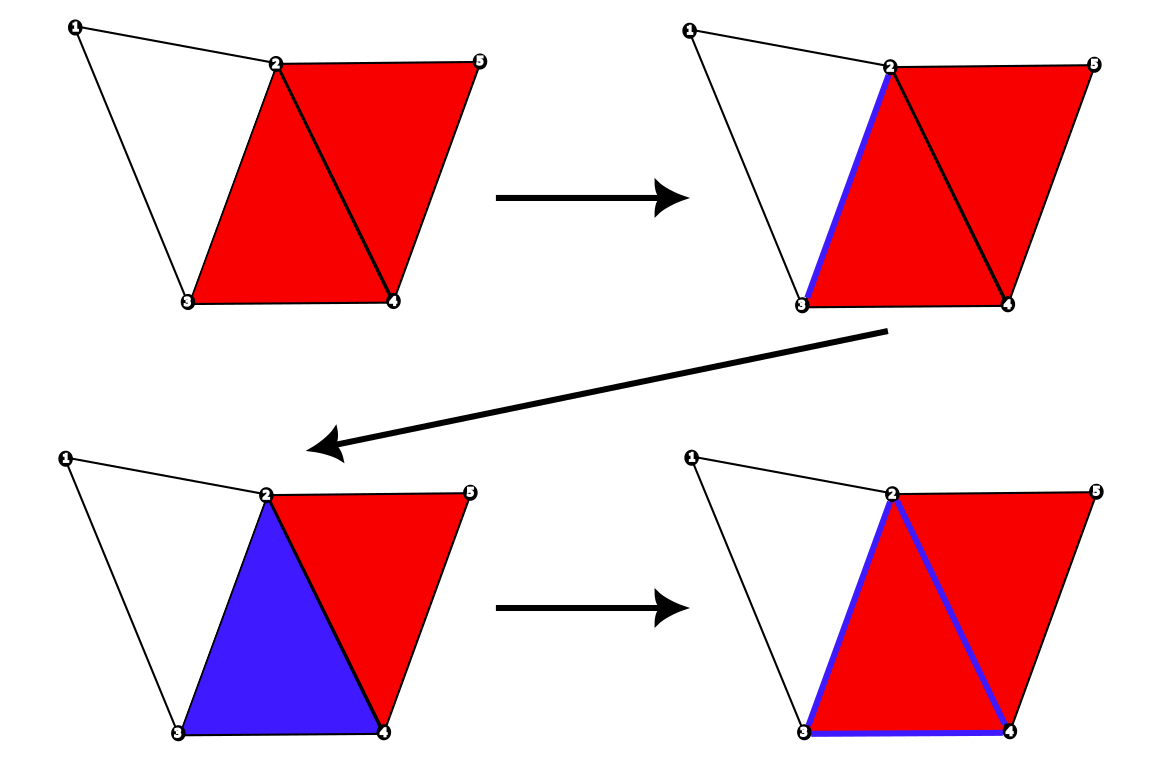

In [11]:
# up laplacian rank 0: vertex to incident edges to incident vertices
up_laplacian_0 = sc_example2.up_laplacian_matrix(rank=0).todense()
print(up_laplacian_0)

[[ 2. -1. -1.  0.  0.]
 [-1.  4. -1. -1. -1.]
 [-1. -1.  3. -1.  0.]
 [ 0. -1. -1.  3. -1.]
 [ 0. -1.  0. -1.  2.]]


An up-Laplacian of rank 0 looks at going from a vertex to its incident edges to its incident vertices. The matrix above is the output of the up-Laplacian of rank 0 on the simplicial complex of example 2. 

This simplicial complex had vertices $[1,2,3,4,5]$ and edges $[1,2],[1,3],[2,3],[2,4],[2,5],[3,4],[4,5]$. The matrix is a 5x5 as it is looking at a vertex and then outputting which vertices are incident to the edges incident to the vertex. 

Row 1 of this matrix is looking at vertex 1. As we can see, vertex 1 is incident to edges $[1,2], [1,3]$. In turn those edges are incident to the vertices 1, 2 and 3. This is seen in the matrix as the first, second and third values of row 1 are non-zero. We may notice that the first entry of this row is different to the other non-zero entries, this is because it is on the diagonal and so represents how many edges vertex 1 is incident to.

Row 5 of this matrix is looking at vertex 5. Vertex 5 is incident to edges $[2,5], [4,5]$ which are incident to the vertices 2, 4 and 5. This is seen in the matrix as on the fifth row the second, foruth and fifth entries are non-zero. The fifth entry is 2, as it is on the diagonal and so is also representing how many edges vertex 5 is incident to. 

In [12]:
# up laplacian rank 1: edge to incident faces to incident edges
up_laplacian_1 = sc_example2.up_laplacian_matrix(rank=1).todense()
print(up_laplacian_1)

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -1.  0.  1.  0.]
 [ 0.  0. -1.  2. -1. -1.  1.]
 [ 0.  0.  0. -1.  1.  0. -1.]
 [ 0.  0.  1. -1.  0.  1.  0.]
 [ 0.  0.  0.  1. -1.  0.  1.]]


An up-Laplacian of rank 1 looks at going from an edge to its incident faces to its incident edges, like in the diagram above. 

Row 1 is looking at the first edge in our list of edges, $[1,2]$. From the diagram we can easily see that this edge is not incident to any faces as there are no red areas adjacent to the edge. This explains why row 1 is full of zero-entries, as there are no faces incident to the edge it means there can not be edges incident to those faces for the output. 

Row 4, however, has lots of non-zero entries. The fourth edge in our list is $[2,4]$, this edge is incident to faces $[2,3,4], [2,4,5]$. These faces are incident to the edges $[2,3], [2,4], [2,5] [3,4], [4,5]$, which are the third, fourth, fifth, sixth and seventh edges in the list. The matrix represent this as the equiavelnt entries in row 4 are non-zero. The fourth entry is different as it is on the diagonal, so it has value 2 to represent the 2 faces that the fourth edge is incident to.

There can be no up-Laplacian of rank 2 because it would mean that its input and output would both be faces, but there is no 'up' from a face to a higher dimension. Trying to do get an up-Laplacian of rank 2 will just throw an error.   

<a id='down_laplacians'></a>

## 5. Down-Laplacians

### Definition of down-Laplacian

<ins>*Rank 1:* </ins>

A matrix of $k \times k$ dimensions such that $k$ is the number of edges in the simplicial complex.

For i $\neq$ j,

$\mathcal{L}_{down}(i,j)$ = 0 if the i$^{th}$ edge is not incident to j$^{th}$ edge via a vertex incident to i$^{th}$ edge, $\neq$ 0 if it is incident.

For i = j, 

$\mathcal{L}_{down}(i,j)$ = n $\in \mathbb{N}$ if the i$^{th}$ edge is incident to n vertices. 

<ins>*Rank 2:*</ins>

A matrix of $k \times k$ dimensions such that $k$ is the number of faces in the simplicial complex.

For i $\neq$ j,

$\mathcal{L}_{down}(i,j)$ = 0 if the i$^{th}$ face is not incident to j$^{th}$ face via an edge incident to i$^{th}$ face, $\neq$ 0 if it is incident.

For i = j, 

$\mathcal{L}_{down}(i,j)$ = n $\in \mathbb{N}$ if the i$^{th}$ face is incident to n edges. 

### Example 2 continued: down-Laplacians

Similarly we have a *down-Laplacian*. A down-Laplacian can have ranks 1 and 2. Rank 1 will take a given edge, look at its incident vertices and then return the edges incident to those vertices. Rank 2 will take a given face, look at its incident edges and return the faces incident to those edges.

Much like the up-Laplacian, the reason there is no down-Laplacian of rank 0 is because the input is a vertex so there is no dimension to go 'down' to when looking at incidence. Another similarity is that the diagonal of the down-Laplacian will represent how many of the object in the dimension below it is incident to.

The diagram below is a visualisation of what the down-Laplacian of rank 1 looks at. This example has taken the third edge $[2,3]$ and looked at the dimension below to see which vertices that edge is incident to. In this case we get 2 and 3. Now, it outputs every edge that vertex is incident to: $[1,2],[1,3],[2,3],[2,4],[2,5],[3,4]$. These edges are the first - sixth edges in the list, this will be represented in the down-Laplacian matrix by the third row having non-zero entries for the first, second, third, fourth, fifth and sixth entries of that row.

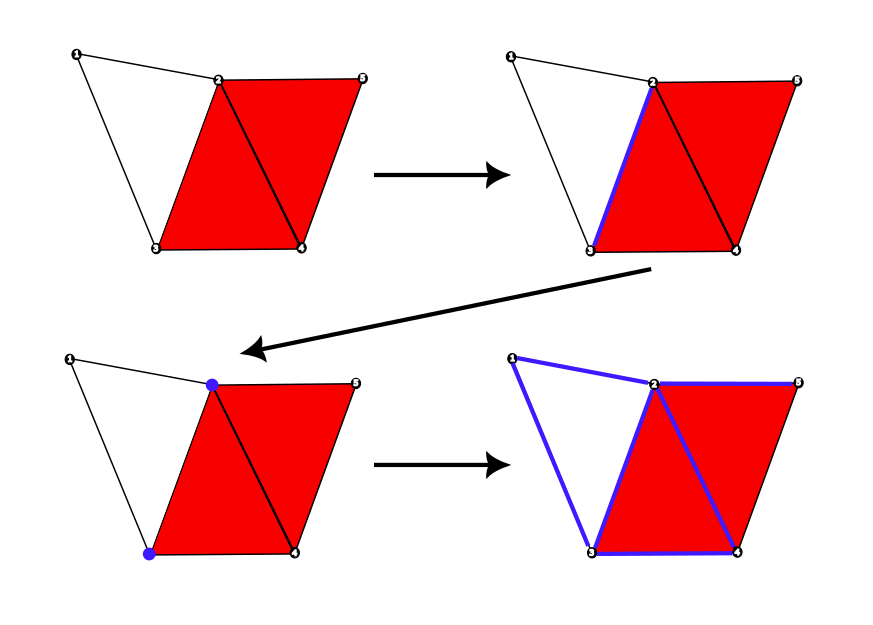

In [13]:
# down laplacian rank 1: edges to incident nodes to incident edges
down_laplacian_1 = sc_example2.down_laplacian_matrix(rank=1).todense()

print(down_laplacian_1)

[[ 2.  1. -1. -1. -1.  0.  0.]
 [ 1.  2.  1.  0.  0. -1.  0.]
 [-1.  1.  2.  1.  1. -1.  0.]
 [-1.  0.  1.  2.  1.  1. -1.]
 [-1.  0.  1.  1.  2.  0.  1.]
 [ 0. -1. -1.  1.  0.  2. -1.]
 [ 0.  0.  0. -1.  1. -1.  2.]]


This is the down-Laplacian of rank 1 for example2, it goes from edges to vertices to edges. 

Row 1 represents the down-Laplacian for the first edge in the lsit of edges, this is the edge $[1,2]$. This is incident to the vertices 1 and 2. These vertices are then incident to the edges $[1,2], [1,3], [2,3], [2,4], [2,5]$. These edges are the first, second, third, fourth and fifth edges in our list of edges, so this is represented in the matrix by row 1 having non-zero values for those entries. The first number is on the diagonal, so it has a value of 2 to show that the first edge is incident to two vertices. 

In [14]:
# down laplacian rank 2: face to incident edges to incident faces
down_laplacian_2 = sc_example2.down_laplacian_matrix(rank=2).todense()

print(down_laplacian_2)

[[ 3. -1.]
 [-1.  3.]]


This is the down-Laplacian of rank 2, it is notably smaller than the other matrices we have encountered because in example2 we only have two faces so the matrix is of size 2x2. This matrix goes from faces to edges to faces. 

Row 1 represents the first face $[2,3,4]$, this is incident to the edges $[2,3],[2,4],[3,4]$. These edges are then incident to both $[2,3,4], [2,4,5]$. Therefor there are no non-zero entries in this row. 

A similiar logic explains row 2 for the face $[2,4,5]$.

Both of the diagonal entries have value 3 because each face is incident to 3 edges. 

<a id='hodge_laplacians'></a>

## 6. Hodge Laplacians

### Definition of Hodge Laplacian

Hodge Laplacian matrix has entry $\mathcal{L}_p(i,j)$, made from up-Laplacian values $\mathcal{L}_{up}(i, j)$ and down-Laplacian values $\mathcal{L}_{down}(i, j)$ such that

$\mathcal{L}_p(i,j)$ = $\mathcal{L}_{up}(i, j)$ + $\mathcal{L}_{down}(i, j)$. 

That is, any entry $(i,j)$ in the Hodge Laplacian matrix is generated by the addition of the equivalent $(i,j)$ values in the up-Laplacian and down-Laplacian matrices. 

### Relation of Hodge Laplacian to up-Laplacian and down-Laplacian

From our definition of Hodge Laplacian, and given what we know about up-Laplacian and down-Laplacian, it may cause us to think about the fact that up-Laplacian only has ranks of 0 and 1 and that down-Laplacian only has ranks of 1 and 2. This means that when we are finding the Hodge Laplacian of rank 0, there are no $\mathcal{L}_{down}(i, j)$  values to be added to $\mathcal{L}_p(i,j)$. Similarly, for a Hodge Laplacian of rank 2, there are no $\mathcal{L}_{up}(i, j)$ values to be added to $\mathcal{L}_p(i,j)$. This leads to the following:

Hodge Laplacian rank 0: $\mathcal{L}_p(i,j)$ = $\mathcal{L}_{up}(i, j)$

Hodge Laplacian rank 1: $\mathcal{L}_p(i,j)$ = $\mathcal{L}_{up}(i, j)$ + $\mathcal{L}_{down}(i, j)$

Hodge Laplacian rank 2: $\mathcal{L}_p(i,j)$ = $\mathcal{L}_{down}(i, j)$. 

In [15]:
hodge_laplacian_0 = sc_example2.hodge_laplacian_matrix(rank=0).todense()

print(hodge_laplacian_0)

[[ 2. -1. -1.  0.  0.]
 [-1.  4. -1. -1. -1.]
 [-1. -1.  3. -1.  0.]
 [ 0. -1. -1.  3. -1.]
 [ 0. -1.  0. -1.  2.]]


This is the Hodge Laplacian matrix of rank 0 for example2. From our defintions above, we can see that this will just be the up-Laplacian matrix of rank 0 - directly compare this to the output above in the up-Laplacian section to confirm. 

In [16]:
hodge_laplacian_1 = sc_example2.hodge_laplacian_matrix(rank=1).todense()

print(hodge_laplacian_1)

[[ 2.  1. -1. -1. -1.  0.  0.]
 [ 1.  2.  1.  0.  0. -1.  0.]
 [-1.  1.  3.  0.  1.  0.  0.]
 [-1.  0.  0.  4.  0.  0.  0.]
 [-1.  0.  1.  0.  3.  0.  0.]
 [ 0. -1.  0.  0.  0.  3. -1.]
 [ 0.  0.  0.  0.  0. -1.  3.]]


This is the Hodge Laplacian matrix of rank 1 for example2. This is the up-Laplacian and down-Laplacian of rank 1 added together. The diagonal now tells us how many objects of dimension one above and one below an edge are incident with that edge. In this case it is representing how many vertices and how many faces combined are incident to an edge. Entry $[4,4]$ for example, is on the diagonal so has a value of 4 as the fourth edge in the list is $[2,4]$ which is incident to 2 faces and 2 vertices. 

In [17]:
hodge_laplacian_2 = sc_example2.hodge_laplacian_matrix(rank=2).todense()

print(hodge_laplacian_2)

[[ 3. -1.]
 [-1.  3.]]


This is the Hodge Laplacian matrix of rank 2 for example2. From our defintions above, we can see that this will just be the down-Laplacian matrix of rank 2 - directly compare this to the output above in the down-Laplacian section to confirm.

<a id='assigning_features'></a>

## 7. Assigning features

The next step is to start assigning data or ’features’ to the faces/edge/vertices.
One way of doing this is with the `set_simplex_attributes`
function available. Below is an example of how it can be used.

In [18]:
# setting what data we want to attach to which faces. order here is important.
face_data = {(2, 3, 4): {"weight": 1}, (2, 4, 5): {"weight": 5}}
sc_example2.set_simplex_attributes(face_data)

Here we have created a dictionary titled `face_data`. This dictionary has listed the faces that we have decided to assign data to, then an attribute name and a value for that attribute, for each face. In this example the attribute is called 'weight'. The different faces in this set can have the same attributes or different ones i.e. there would be no issues giving the face $[2,4,5]$ a different attribute called 'weight2' in our `face_data`. 

The second line uses the function `set_simplex_attributes` to set the attributes to the simplicial complex, in this case we are using our simplicial complex from earlier titled `example2`. 

In [19]:
face_weights = sc_example2.get_simplex_attributes("weight")
example2_face_values = np.array(list(face_weights.values()))

print(face_weights)
print(example2_face_values)

{frozenset({2, 3, 4}): 1, frozenset({2, 4, 5}): 5}
[1 5]


The `get_simplex_attributes` function displays the sets of the faces that have the attribute in question and what value is associated with it. In this example, we are getting the attribute 'weight' for the two faces $[2,3,4], [2,4,5]$. We see that `toponetx` follows the same API as `networkx`, specifically with its related methods `get_node_attributes` and `get_edge_attributes`.

The second line is a way of formatting just the values of the weights into a list.

Below shows a visual representation of each face highlighted and labelled with its assigned value.

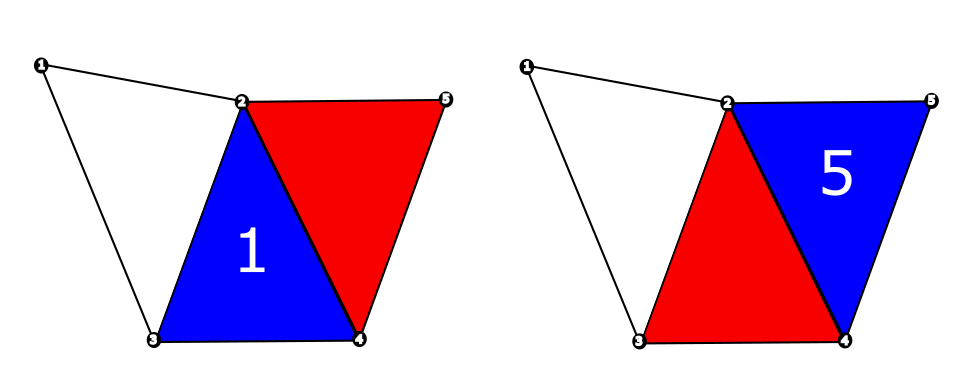

In [20]:
print(incidence_2.shape)
incidence_2.dot(example2_face_values)

(7, 2)


array([ 0.,  0.,  1.,  4., -5.,  1.,  5.])

The cell above has computed the dot product between the list of data values and the B2 matrix which, as defined above, is an incidence matrix of degree 2 so looks at which edges are associated with which faces. The output of this cell is spreading those data values out onto the edges, proportional to the faces.

What if we have edge data we want to push out proportionally to the faces? We need
to transpose the B2 matrix. 

In [21]:
edge_data = {
    (1, 2): {"attr": 6},
    (1, 3): {"attr": -13},
    (2, 3): {"attr": -6},
    (2, 4): {"attr": 7},
    (3, 4): {"attr": 12},
    (2, 5): {"attr": 19},
    (4, 5): {"attr": 19},
}

sc_example2.set_simplex_attributes(edge_data)

edge_attrs = sc_example2.get_simplex_attributes("attr")
example2_edge_values = np.array(list(edge_attrs.values()))

new_face_feature = incidence_2.T.dot(example2_edge_values)

print(new_face_feature)

[ 6. 14.]


This is a reverse of the process above. We start with a dictionary we have defined called `edge_data`, made up of edges and attributes and values we wish to assign to them. These attributes are assigned to the simplicial complex `example2`. Then, we create a list of all the data values and dot this but with a transposed version of the `incidence_2` matrix - as we are now going from edges to faces. 

The output of this is the new values assigned to the faces, which is proportional from the edges and their original values. 

## References

$[1]$: Wikipedia. (2022). Abstract simplicial complex. [online] Available at: https://en.wikipedia.org/wiki/Abstract_simplicial_complex [Accessed 22 Feb. 2023].

$[2]$: www.scientificlib.com. (n.d.). *Incidence matrix*. [online] Available at: http://www.scientificlib.com/en/Mathematics/LX/IncidenceMatrix.html. [Accessed 3 Jan. 2023].

$[3]$: Wikipedia. (2020). Simplex. [online] Available at: https://en.wikipedia.org/wiki/Simplex.

$[4]$: Wikipedia. (2023). Polytope. [online] Available at: https://en.wikipedia.org/wiki/Polytope [Accessed 2 Feb. 2023].

$[5]$: Sommer, P. (2020). A gentle introduction to the convex hull problem. [online] Medium. Available at: https://medium.com/@pascal.sommer.ch/a-gentle-introduction-to-the-convex-hull-problem-62dfcabee90c.

$[6]$: Schneider, J. (2019). Geometry of Simplexes. [online] Available at: http://homepages.math.uic.edu/~jschnei3/Writing/Simplexes [Accessed 2 Feb. 2023].

$[7]$: Wikipedia. (2020). Sparse matrix. [online] Available at: https://en.wikipedia.org/wiki/Sparse_matrix.